In [42]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from ml_utilities.torch_models.base_model import BaseModel
from ml_utilities.torch_models.fc import FC
from ml_utilities.torch_models import get_model_class
from omegaconf import OmegaConf
import torchvision.transforms as transforms
import torchvision

from erank.utils import load_directions_matrix_from_task_sweep
import matplotlib.pyplot as plt
from ml_utilities.data_utils import calculate_dataset_mean_std, show_images
from ml_utilities.utils import convert_dict_to_python_types
gpu_id = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
data_dir = '/system/user/beck/pwbeck/data/cifar'

In [44]:
transform = transforms.Compose([transforms.ToTensor()])

In [45]:
cf10_train_unnormalized = torchvision.datasets.CIFAR10(root=data_dir, train=True, transform=transform, download=True)
cf10_test_unnormalized = torchvision.datasets.CIFAR10(root=data_dir, train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


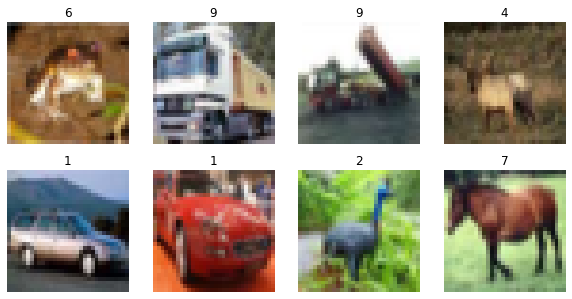

In [46]:
show_images(cf10_train_unnormalized, 10,4)

In [47]:
mean, std = calculate_dataset_mean_std(cf10_train_unnormalized)

100%|██████████| 196/196 [00:04<00:00, 46.14it/s]


In [48]:
mean, std

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2023, 0.1994, 0.2010]))

In [49]:
normalizer = dict(mean=mean, std=std)

In [50]:
normalizer = convert_dict_to_python_types(normalizer)
normalizer

{'mean': [0.4913995563983917, 0.48215848207473755, 0.44653093814849854],
 'std': [0.20230084657669067, 0.19941289722919464, 0.20096157491207123]}

In [51]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(normalizer['mean'], normalizer['std'])])

In [52]:
cf10_train = torchvision.datasets.CIFAR10(root=data_dir, train=True, transform=transform2, download=True)
cf10_test = torchvision.datasets.CIFAR10(root=data_dir, train=False, transform=transform2, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [53]:
calculate_dataset_mean_std(cf10_train)

100%|██████████| 196/196 [00:06<00:00, 30.38it/s]


(tensor([ 6.6755e-07, -3.2190e-07, -7.5331e-08]),
 tensor([1.0000, 1.0000, 1.0000]))

In [54]:
calculate_dataset_mean_std(cf10_test)

100%|██████████| 40/40 [00:01<00:00, 30.68it/s]


(tensor([0.0139, 0.0149, 0.0193]), tensor([0.9985, 0.9985, 1.0008]))

In [55]:
type(cf10_train)

torchvision.datasets.cifar.CIFAR10

In [56]:
cf10_train[0][0].shape

torch.Size([3, 32, 32])